Zofia Jankowska

Zadanie 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
names = iris.feature_names
data = pd.DataFrame(iris.data, columns = names)
y = pd.DataFrame(iris.target)

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [5]:
data.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [6]:
from sklearn.preprocessing import scale
data = pd.DataFrame(scale(data), index=data.index, columns=data.columns)

In [7]:
data.mean()

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

In [8]:
data.var()

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

In [11]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, test_size=0.25)

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train, y_train)
covariance = pca.get_covariance()
covariance

array([[ 1.0255888 , -0.11953459,  0.88810099,  0.80092813],
       [-0.11953459,  1.06170354, -0.43097581, -0.36388862],
       [ 0.88810099, -0.43097581,  1.00633992,  0.93823743],
       [ 0.80092813, -0.36388862,  0.93823743,  0.9409671 ]])

In [13]:
eigvals, eigvecs = scipy.linalg.eig(covariance)
print(eigvals, '\n', eigvecs)

[2.89884815+0.j 0.96820887+0.j 0.14813862+0.j 0.01940373+0.j] 
 [[ 0.52913567 -0.37557292 -0.71683839  0.25515319]
 [-0.2800155  -0.92351522  0.23827799 -0.10924537]
 [ 0.58391228 -0.03951856  0.16947816 -0.79294507]
 [ 0.54831853 -0.06710365  0.63296404  0.54240244]]


In [14]:
eigvals_desc = list(reversed(sorted(eigvals)))
eigvals_desc

[(2.8988481451778654+0j),
 (0.9682088719197903+0j),
 (0.1481386150908856+0j),
 (0.019403727154410955+0j)]

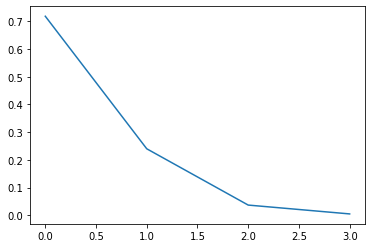

In [15]:
pca.explained_variance_ratio_
plt.plot(pca.explained_variance_ratio_)

In [16]:
pca =  PCA(svd_solver='full', n_components=0.95)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_components)
principal_df.head()

,0,1
0,1.802753,-0.167133
1,0.657262,-0.063240
2,-0.530568,-1.857762
3,-2.254566,-0.012283
4,-0.080195,-1.064030
